In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

In [63]:
dataset  = pd.read_csv("31-40.csv")

In [64]:
#Extracting and splitting the data into training and test sets
features = dataset [['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
target = dataset ['cit_2022']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [65]:
# Determining the ideal number of clusters using Elbow Method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_train)
    inertia_values.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


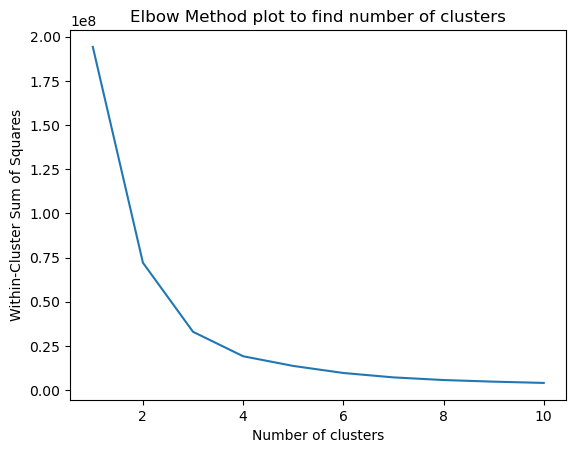

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia_values)
plt.title('Elbow Method plot to find number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares') 
plt.show()


In [70]:
#Fitting the K-Means model with the optimal number of clusters
optimal_num_clusters = 3
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(features_train)


KMeans(n_clusters=3, random_state=0)

In [71]:
# Assigning test data to the nearest cluster centroid
test_cluster_labels = kmeans.predict(features_test)


In [72]:
# Predict based on the mean of nearest neighbors from the training set
nearest_neighbor_predictions = []
for i, test_data in enumerate(features_test.values):
    cluster_label = test_cluster_labels[i]
    cluster_indices = np.where(kmeans.labels_ == cluster_label)
    nearest_neighbor_indices = [index for index in cluster_indices[0] if index != i]
    nearest_neighbor_citations = target_train.iloc[nearest_neighbor_indices]
    nearest_neighbor_predictions.append(nearest_neighbor_citations.mean())


In [73]:
# Predict based on the cluster centroid closest to each test point
cluster_centroid_predictions = kmeans.cluster_centers_[test_cluster_labels]


In [77]:
# Predict based on the average of citations within the same cluster
average_cluster_predictions = []
for i, test_data in enumerate(features_test.values):
    cluster_label = test_cluster_labels[i]
    cluster_indices = np.where(kmeans.labels_ == cluster_label)
    cluster_citations = target_train.iloc[cluster_indices]
    average_cluster_predictions.append(cluster_citations.mean())
# Flatten the cluster_centroid_predictions array to match dimensions
cluster_centroid_predictions_flat = cluster_centroid_predictions[np.arange(len(cluster_centroid_predictions)), test_cluster_labels]


In [78]:
# Evaluate the predictions using the mean absolute error (MAE)
nearest_neighbor = mean_absolute_error(target_test, nearest_neighbor_predictions)
cluster_centroid = mean_absolute_error(target_test, cluster_centroid_predictions_flat)
average_cluster = mean_absolute_error(target_test, average_cluster_predictions)

In [79]:
# Print the MAE for each method
print("Mean absolute error with the 3 predictions strategies are: ")
print("Nearest Neighbor :", nearest_neighbor)
print("Cluster Centroid :", cluster_centroid)
print("Average Cluster :", average_cluster)


Mean absolute error with the 3 predictions strategies are: 
Nearest Neighbor : 213.4379428873612
Cluster Centroid : 161.23709677419347
Average Cluster : 213.26290322580644


In [82]:
predictions_table = pd.DataFrame(features_test)
predictions_table['Actual 2022 Citations'] = target_test
predictions_table['Nearest Neighbor Prediction'] = nearest_neighbor
predictions_table['Cluster Centroid Prediction'] = cluster_centroid
predictions_table['Average Cluster Prediction'] = average_cluster
#Exporting Data
print(predictions_table)
predictions_table.to_csv('predictions.csv', index=False)

    cit_2017  cit_2018  cit_2019  cit_2020  cit_2021  Actual 2022 Citations  \
83       628       766      1032      1146      1652                   2043   
53      1194      1292      1151       947      1049                   1004   
70       255       238       204       194       184                    155   
45       192       224       170       193       167                    145   
44        87        92        87        73        93                     93   
39        92       107       137        92        98                    121   
22       158       137       124       117       142                    158   
80       234       222       216       165       169                    149   
10       423       171       215       133        42                     14   
0          7        22        51        70       108                    137   
18       125       400       266        35        82                     52   
30        40        69       120       187       208